In [198]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [199]:
dataset = pd.read_csv("../../../dataset/Salary_Data.csv")

In [200]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values.reshape(-1, 1)

In [201]:
# from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
# LabelEncoder_X = LabelEncoder()
# X[:,3] = LabelEncoder_X.fit_transform(X[:,3])

In [202]:
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([("Profit", OneHotEncoder(), [3])], remainder = 'passthrough')
# X = ct.fit_transform(X)

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X_train)
Y = sc_Y.fit_transform(Y_train)

In [204]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\arcyj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [210]:
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[4.0]]))))
Y_pred

array([61518.10826916])

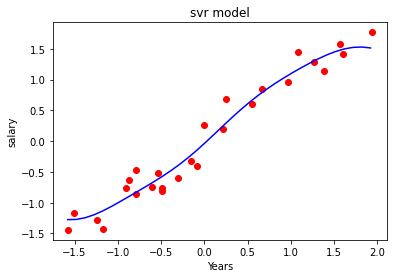

In [207]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
mtp.scatter(X ,Y,color ='red')
mtp.plot(X_grid,regressor.predict(X_grid), color = 'blue')
mtp.title('svr model')
mtp.xlabel('Years')
mtp.ylabel('salary')
mtp.show()